In [2]:
from sedfitter.sed import SEDCube
from sedfitter.fit import Fitter
from sedfitter.fit_info import FitInfoFile
from sedfitter.fit_info import FitInfo
from sedfitter.extinction import Extinction
from sedfitter.source import Source
import sedfitter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.constants as const
import astropy.units as u
import os

In [3]:
extinction = Extinction.from_file('../data/raw/whitney.r550.par')

In [4]:
apertures = [3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
             3., 3., 20., 30., 30., 30.] * u.arcsec

In [5]:
filterstest2 = [.36 * u.um, .44 * u.um, .55 * u.um, .64 * u.um, .79 * u.um, 
               '2J', '2H', '2K', 'I1', 'I2',
               'I3', 'I4', 9.95 * u.um, 12.93 * u.um, 17.72 * u.um, 'M1',
               29.95 * u.um, 35.06 * u.um, 71.42 * u.um, 155.9 * u.um, 443.0 * u.um, 863.0 * u.um]
filterpeaks = [.36, .44, .55, .64, .79, 
               1.235, 1.662, 2.159, 3.6, 4.5, 5.8, 8.0,
               9.95, 12.93, 17.72, 23.675,
               29.95, 35.06, 71.42, 155.9, 443.0, 863.0] * u.micron

In [8]:
print(type(filterpeaks[0].value))
print(type(apertures))

<class 'numpy.float64'>
<class 'astropy.units.quantity.Quantity'>


In [9]:
def fit(filts, aps, model, extinction, distance_r, av_r, remove_resolved, source):
    '''
    Function to fit a model directory to a source file
    Inputs:
        filters, apertures, path to model directory, extinction law, distance range, av range, remove_resolved, and path to source file.
    Outputs: FitInfo Object
    '''
    fitter = Fitter(filts, aps, model,
              extinction_law=extinction,
              distance_range=distance_r,
              av_range=av_r, remove_resolved=remove_resolved)
    
    sourcefile = open(source,'r')
    s = Source()
    s = Source.from_ascii(sourcefile.readline())
    sourcefile.close()

    info = fitter.fit(s)
    return info

In [6]:
# Rather than use the sedfitter.fit() function, we go through the steps it takes ourselves so as to keep the output FitInfo file
# Here we instantiate a Fitter object
fitter = Fitter(filterstest2, apertures, '../data/galaxySEDs/Ly_break',
              extinction_law=extinction,
              distance_range=[0.869, 0.961] * u.kpc,
              av_range=[0., 40.], remove_resolved=True)

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  Ly_break
   Log[d] stepping     :  0.02

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

Data shape=(1, 22).  use_memmap=True
   Reading fluxes at 0.36 um
   Reading fluxes at 0.44 um
   Reading fluxes at 0.55 um
   Reading fluxes at 0.64 um
   Reading fluxes at 0.79 um
   Reading ../data/galaxySEDs/Ly_break/convolved/2J.fits
   Reading ../data/galaxySEDs/Ly_break/convolved/2H.fits
   Reading ../data/galaxySEDs/Ly_break/convolved/2K.fits
   Reading ../data/galaxySEDs/Ly_break/convolved/I1.fits
   Reading ../data/galaxySEDs/Ly_break/convolved/I2.fits
   Reading ../data/galaxySEDs/Ly_break/convolved/I3.fits
   Reading ../data/galaxySEDs/Ly_break/convolved/I4.fits
   Reading fluxes at 9.95 um
   Reading fluxes 

In [7]:
# Opening Source file to fit
sourcepath = '../data/raw/data_ngc2264_20_normalized.txt'
sourcefile = open(sourcepath,'r')
s = Source()
s = Source.from_ascii(sourcefile.readline())
sourcefile.close()

In [8]:
print(len([x for x in s.valid if x == 1]))
chi2_DOF = len([x for x in s.valid if x == 1])

16


In [9]:
# Fits to source using call to models.fit()
info = fitter.fit(s)

In [10]:
info = fit(filterstest2, apertures, '../data/galaxySEDs/Ly_break',
              extinction,
              [0.869, 0.961] * u.kpc,
              [0., 40.], True, '../data/raw/data_ngc2264_20_normalized.txt')

 ------------------------------------------------------------
  => Model parameters
 ------------------------------------------------------------

   Models              :  Ly_break
   Log[d] stepping     :  0.02

 ------------------------------------------------------------
  => Reading in convolved fluxes
 ------------------------------------------------------------

Data shape=(1, 22).  use_memmap=True
   Reading fluxes at 0.36 um
   Reading fluxes at 0.44 um
   Reading fluxes at 0.55 um
   Reading fluxes at 0.64 um
   Reading fluxes at 0.79 um
   Reading ../data/galaxySEDs/Ly_break/convolved/2J.fits
   Reading ../data/galaxySEDs/Ly_break/convolved/2H.fits
   Reading ../data/galaxySEDs/Ly_break/convolved/2K.fits
   Reading ../data/galaxySEDs/Ly_break/convolved/I1.fits
   Reading ../data/galaxySEDs/Ly_break/convolved/I2.fits
   Reading ../data/galaxySEDs/Ly_break/convolved/I3.fits
   Reading ../data/galaxySEDs/Ly_break/convolved/I4.fits
   Reading fluxes at 9.95 um
   Reading fluxes 

In [20]:
print(info.source.name)

20


In [10]:
# Lets check out what's in info - This is what we want to save for imputation
print(info.chi2)
print(info.model_fluxes) # Use to fill in all values labeled 3 (upper limit)
print(info.source)
print(info.av)
print(info.sc)
print(info.model_id)
print(info.model_name)
#chi2_DOF = len([x for x in s.valid if x == 1])


[351.41410841]
[[-2.336027   -1.53650246 -0.74746365 -0.47993133  1.00286194  2.18346527
   2.61872918  2.87983607  3.16698143  3.23543417  3.32268936  3.47270639
   3.57624864  3.72708913  3.78162129  3.95810899  4.2458117   4.26142073
   4.42991351  4.60651471  2.83375966  2.41388297]]
Source name : 20
x           : 100.20250
y           :   9.59936
F =   0.0000e+00 + / -   0.0000e+00 mJy (0)  Log[F] =  0.00000+ / - 0.00000
F =   0.0000e+00 + / -   0.0000e+00 mJy (0)  Log[F] =  0.00000+ / - 0.00000
F =   1.4485e-01 + / -   1.4485e-02 mJy (1)  Log[F] = -0.84125+ / - 0.04343
F =   1.0000e+00 + / -   1.0000e-01 mJy (1)  Log[F] = -0.00217+ / - 0.04343
F =   4.5303e+00 + / -   4.5303e-01 mJy (1)  Log[F] =  0.65396+ / - 0.04343
F =   9.3388e+01 + / -   9.3388e+00 mJy (1)  Log[F] =  1.96812+ / - 0.04343
F =   3.2156e+02 + / -   3.2156e+01 mJy (1)  Log[F] =  2.50509+ / - 0.04343
F =   7.2599e+02 + / -   7.2599e+01 mJy (1)  Log[F] =  2.85876+ / - 0.04343
F =   1.5438e+03 + / -   1.5438e+02 mJ

In [15]:
sourceflux = np.array(info.source.to_ascii().split()[25:-1:2]).astype(float)
print(sourceflux)

[0.000e+00 0.000e+00 1.449e-01 1.000e+00 4.530e+00 9.339e+01 3.216e+02
 7.260e+02 1.544e+03 2.112e+03 2.942e+03 3.908e+03 4.865e+03 6.420e+03
 9.166e+03 1.128e+04 1.192e+04 1.281e+04 1.242e+04 0.000e+00 3.170e+04
 2.791e+03]


In [40]:
savables = pd.DataFrame(columns = ['ID', 'Model', 'Model Fluxes', 'Chi^2', 'Chi^2 DOF', 'Av', 'Scale'])
savables.loc[len(savables.index)] = [info.source.name, info.model_name, info.model_fluxes, info.chi2, 16, info.av, info.sc]
savables.loc[len(savables.index)] = [info.source.name, info.model_name[0], info.model_fluxes[0], info.chi2[0], 16, info.av[0], info.sc[0]] # Money!!
savables

,ID,Model,Model Fluxes,Chi^2,Chi^2 DOF,Av,Scale
0,20,[Ly_break],"[[-2.3360270032737085, -1.536502462134818, -0....",[351.41410840757305],16,[8.24098969211144],[-1.3669661214210513]
1,20,Ly_break,"[-2.3360270032737085, -1.536502462134818, -0.7...",351.41410840757305,16,8.24098969211144,-1.3669661214210513


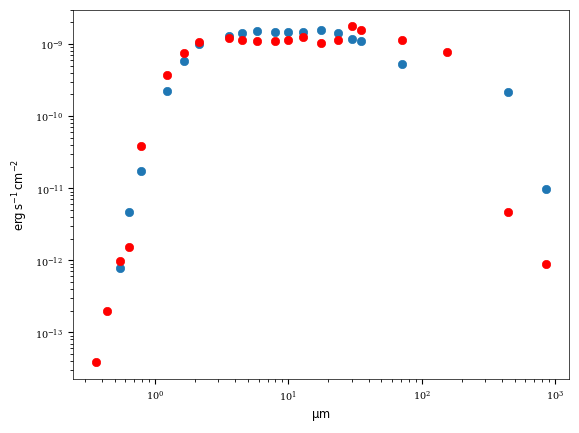

In [13]:
from astropy.visualization import quantity_support
quantity_support()
filterpeaks = [x.value for x in filterpeaks] * u.um
modelflux = 10**(info.model_fluxes) * u.mJy
modelfluxdens = modelflux.to(u.erg / u.cm**2 / u.s, equivalencies = u.spectral_density(filterpeaks))
sourceflux = np.array(info.source.to_ascii().split()[25:-1:2]).astype(float)
sourceflux = sourceflux * u.mJy
sourcefluxdens = sourceflux.to(u.erg / u.cm**2 / u.s, equivalencies = u.spectral_density(filterpeaks))
plt.scatter(filterpeaks, sourcefluxdens)
plt.scatter(filterpeaks,modelfluxdens,color='r')
plt.xscale('log')
plt.yscale('log')

In [ ]:
print(sourceflux)

In [14]:
# Save info for plotting methods MAKE SURE TO CLOSE FILE I/O
output = '../data/outputs/output_ngc2264_Ly_break2.fitinfo'
fout = FitInfoFile(output,'w')
#info = info.keep(output_format)
fout.write(info)
fout.close()

In [15]:
linecol = sedfitter.plot('../data/outputs/output_ngc2264_Ly_break2.fitinfo',
               plot_mode='A',
               select_format=('N', 1),
               show_convolved=False, show_sed=True,
               x_mode='M', x_range=(0.1, 2000),
               y_mode='M', y_range=(1.e-14, 2e-8))


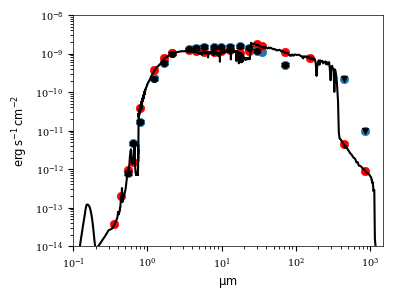

In [26]:
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt

original_linecol = linecol['20']['lines']
segments = original_linecol.get_segments()
colors = original_linecol.get_colors()
linestyles = original_linecol.get_linestyles()
linewidths = original_linecol.get_linewidths()

new_linecol = LineCollection(segments, colors=colors, linestyles=linestyles, linewidths=linewidths)

fig, ax = plt.subplots(figsize = (4,3))
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(0.1,1500)
ax.set_ylim(10**-14,10**-8)

ax.add_collection(new_linecol)
ax.scatter(filterpeaks, sourcefluxdens)
ax.scatter(filterpeaks,modelfluxdens,color='r')
#ax.xscale('log')
#ax.yscale('log')

sedfitter.plot_source_data(ax, linecol['20']['source'], linecol['20']['filters'])
plt.show()

In [51]:
sedfitter.plot('../data/outputs/output_ngc2264_Ly_break2.fitinfo',
                   output_dir='../data/outputs/galaxytest5', format='png',
                   plot_mode='A',
                   select_format=('F', 3.),
                   show_convolved=False, show_sed=True,
                   x_mode='M', x_range=(0.1, 2000),
                   y_mode='M', y_range=(1.e-14, 2e-8))